__Нейросетевая языковая модель BERT__ 

Евгений Борисов <esborisov@sevsu.ru>

оцениваем семантическую близость строк

https://www.sbert.net/docs/quickstart.html

In [2]:
# !pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 KB 498.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.2/895.2 KB 3.1 MB/s eta 0:00:0000:0100:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120748 sha256=48ad0c54b70df00caa228058ddc63525e8e5870b74950558c25d61b85faaf634
  Stored in directory: /home/mechanoid/.cache/pip/wheels/0c/b6/fb/2289a932c365293ad865fc1fe9d2db694d5584241c6d670874
Successfully built sentence-transformers


In [3]:
import numpy as np

import torch

from sentence_transformers import SentenceTransformer
from sentence_transformers import util

# np.set_printoptions(precision=2)

---

distiluse-base-multilingual-cased-v1 
    
Multilingual knowledge distilled version of multilingual Universal Sentence Encoder.  
Supports 15 languages: Arabic, Chinese, Dutch, English, French, German, Italian, Korean, Polish, Portuguese, __Russian__, Spanish, Turkish.

paraphrase-xlm-r-multilingual-v1 

Multilingual version of paraphrase-distilroberta-base-v1, trained on parallel data for 50+ languages.

In [6]:
model_name = 'distiluse-base-multilingual-cased-v1'
# model_name = 'paraphrase-distilroberta-base-v1'

model = SentenceTransformer(model_name)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [7]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)

In [ ]:
sentences = [
    'A man is eating food.',
    'A man is eating a piece of bread.',
    'The girl is carrying a baby.',
    'A man is riding a horse.',
    'A woman is playing violin.',
    'Two men pushed carts through the woods.',
    'A man is riding a white horse on an enclosed ground.',
    'A monkey is playing drums.',
    'Someone in a gorilla costume is playing a set of drums.',
    ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.pytorch_cos_sim(embeddings, embeddings).cpu().detach().numpy() # .flatten()[0]

In [13]:
# !pip install seaborn

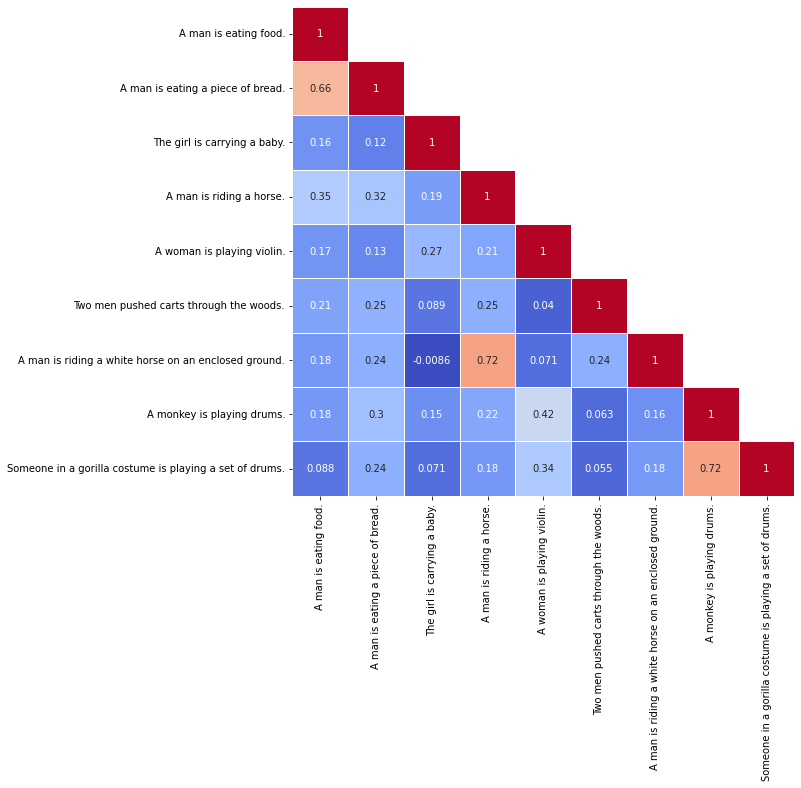

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.zeros_like(cos_sim)
mask[ np.triu_indices_from(mask,k=1) ] = True

plt.figure(figsize=(9,9))
ax = sns.heatmap(
    cos_sim, 
    mask=mask, 
    cmap='coolwarm', 
    annot=True, 
    linewidths=.5,
    cbar=False,
    xticklabels=sentences,
    yticklabels=sentences,
)
plt.show()

In [16]:
# #Sentences are encoded by calling model.encode()
# emb1 = model.encode("This is a red cat with a hat.")
# emb2 = model.encode("Have you seen my red cat?")

# cos_sim = util.pytorch_cos_sim(emb1, emb2).cpu().detach().numpy().flatten()[0]
# print('embeddings size:', emb1.shape)
# print('Cosine-Similarity:', cos_sim)

In [9]:
#print(cos_sim) #.shape

# #Add all pairs to a list with their cosine similarity score
# all_sentence_combinations = []
# for i in range(len(cos_sim)-1):
#     for j in range(i+1, len(cos_sim)):
#         all_sentence_combinations.append([cos_sim[i][j], i, j])

# #Sort list by the highest cosine similarity score
# all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

# print("Top-5 most similar pairs:")
# for score, i, j in all_sentence_combinations[0:5]:
#     print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

[[ 1.    0.66  0.16  0.35  0.17  0.21  0.18  0.18  0.09]
 [ 0.66  1.    0.12  0.32  0.13  0.25  0.24  0.3   0.24]
 [ 0.16  0.12  1.    0.19  0.27  0.09 -0.01  0.15  0.07]
 [ 0.35  0.32  0.19  1.    0.21  0.25  0.72  0.22  0.18]
 [ 0.17  0.13  0.27  0.21  1.    0.04  0.07  0.42  0.34]
 [ 0.21  0.25  0.09  0.25  0.04  1.    0.24  0.06  0.06]
 [ 0.18  0.24 -0.01  0.72  0.07  0.24  1.    0.16  0.18]
 [ 0.18  0.3   0.15  0.22  0.42  0.06  0.16  1.    0.72]
 [ 0.09  0.24  0.07  0.18  0.34  0.06  0.18  0.72  1.  ]]
